# DECISION TREE TO PREDICT WHETHER MUSHROOMS ARE POISONOUS OR EDIBLE

1. Split your data into train and test sets. 
2. Get basic descriptive statistics for the training data and check for missing and incorrect or extreme values. Get scatterplots or heatmaps showing the relationship between the variables. 
3. What are the factors that predict whether a mushroom is poisonous? 
4. Report the accuracy of your model on the training set and on the test set. How successful is the model - what is its precision and recall? 
5. What is the prevalence of poisonous mushrooms in the dataset? How might prevalence affect the positive and negative predictive values of a test/model?

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO 
from IPython.display import Image 
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

Importing the CSV file in order to read and analyse the data.

In [2]:
mushroom_data = pd.read_csv('agaricus-lepiota.data')

We going to see how the data looks and rename columns to make the data more understandable.

In [3]:
mushroom_data.head()

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g


In [4]:
mushroom_data = mushroom_data.rename(columns={
    "p": "classes",
    "x":"cap-shape",
    "s":"cap-surface",
    "n":"cap-color",
    "t":"bruises",
    "p.1":"odor",
    "f":"gill-attachment",
    "c":"gill-spacing",
    "n.1":"gill-size",
    "k":"gill-color",
    "e":"stalk-shape",
    "e.1":"stalk-root",
    "s.1":"stalk-surface-above-ring",
    "s.2":"stalk-surface-below-ring",
    "w":"stalk-color-above-ring",
    "w.1":"stalk-color-above-ring",
    "p.2":"veil-type",
    "w.2":"veil-color",
    "o":"ring-number",
    "p.3":"ring-type",
    "k.1":"spore-print-color",
    "s.3":"population",
    "u":"habitat"
})
mushroom_data.head()

,classes,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-above-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g


Now we need to chack for any missing values and also know the type of date we are working with.

In [5]:
mushroom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8123 entries, 0 to 8122
Data columns (total 23 columns):
classes                     8123 non-null object
cap-shape                   8123 non-null object
cap-surface                 8123 non-null object
cap-color                   8123 non-null object
bruises                     8123 non-null object
odor                        8123 non-null object
gill-attachment             8123 non-null object
gill-spacing                8123 non-null object
gill-size                   8123 non-null object
gill-color                  8123 non-null object
stalk-shape                 8123 non-null object
stalk-root                  8123 non-null object
stalk-surface-above-ring    8123 non-null object
stalk-surface-below-ring    8123 non-null object
stalk-color-above-ring      8123 non-null object
stalk-color-above-ring      8123 non-null object
veil-type                   8123 non-null object
veil-color                  8123 non-null object
ring-number

In [6]:
mushroom_data.isnull().values.any()

False

In [7]:
mushroom_data["classes"].value_counts()

e    4208
p    3915
Name: classes, dtype: int64

From the above results, the are no missing values and the datatype is object(23). What needs to be done is to change the datatype into an integer

Now we will split the data into the predictor variable and the independent. The dependent variable is the classes column because we need the rest of the data in other columns to determine what features result in mushrooms breing poisisous or edible.  

In [8]:
Y = mushroom_data['classes']
X = mushroom_data[mushroom_data.columns[1:]]

The data in the dataframe is categorical so we will use dummy representation which will split each column according to the number of values it has, we also change the datatype into int64.

In [9]:
X_dummy = pd.get_dummies(X)

In [10]:
Y_dummy = Y.apply(lambda x: 1 if x=='e' else 0)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(  
    X, Y, test_size = 0.3, random_state = 100) 

We are going to split the data into training and test data. Then we will find the correlation matrix which will allow us to plot a heat map. The heatmap will give a clearer view of the relationship between the columns and also showing the strength of the relationship.

In [20]:
mushroom_data = mushroom_data.iloc[:,1:-1]

In [21]:
label_encoder = LabelEncoder()
mushroom_data.iloc[:,0] = label_encoder.fit_transform(mushroom_data.iloc[:,0]).astype('float64')

In [47]:
corr = mushroom_data.corr()

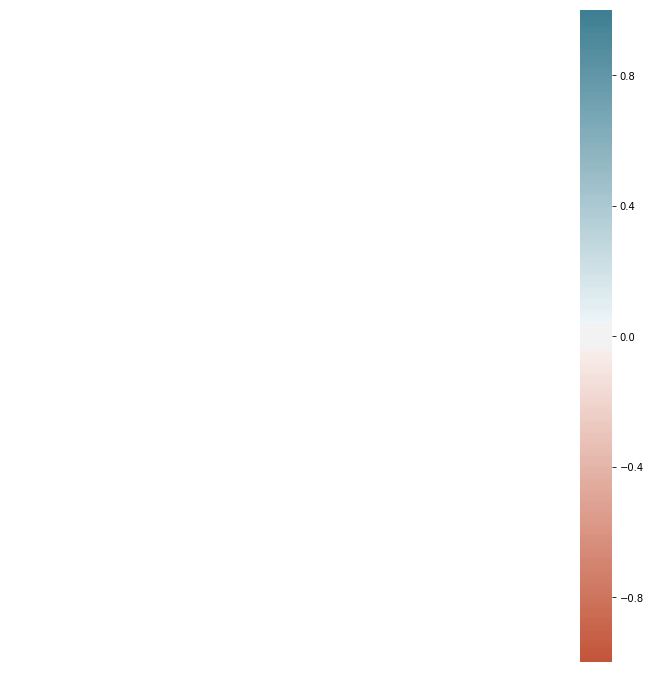

In [48]:
plt.figure(figsize=(12,12))
# sns.heatmap(corr, vmin=-1, vmax=1, annot=True, linewidth=0.1)
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200),square=True)

In [50]:
svc=SVC()
svc.fit(X_train, y_train)

prediction = svc.predict(X_test)

cm = confusion_matrix(y_test, prediction)
sum = 0
for i in range(cm.shape[0]):
    sum += cm[i][i]
    
accuracy = sum/x_test.shape[0]
print(accuracy)

ValueError: could not convert string to float: 'd'

In [51]:
prediction = svc.predict(X_test)

NotFittedError: This SVC instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [52]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

ValueError: could not convert string to float: 'f'